In [250]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_val_score 

In [251]:
x, y = make_classification(scale = 1)
x

array([[ 0.43933531,  0.94730673, -1.45904818, ..., -0.88267528,
        -0.27343026,  0.86231074],
       [ 0.75932523,  0.36864482, -1.03768898, ...,  0.91976585,
        -0.73226819, -1.02595256],
       [ 0.7803387 ,  1.22562644,  1.58128676, ..., -0.48600028,
         0.71280777, -0.71149547],
       ...,
       [ 1.27753852, -0.05485747, -1.05337209, ...,  0.32472287,
        -0.20605404, -0.79060916],
       [ 0.30894358, -0.04532537, -0.70760966, ..., -1.26652535,
         0.24649693,  0.94006579],
       [ 0.0418482 , -0.45173283, -1.11077285, ...,  0.29900939,
        -1.91361724, -2.0721183 ]])

In [252]:
y

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [253]:
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.439335,0.947307,-1.459048,-0.643214,-1.344431,0.836914,-0.685564,1.959171,-0.765674,-1.049777,-0.051305,-0.790169,-0.678882,-0.247674,0.652011,-0.389605,-0.564156,-0.882675,-0.273430,0.862311
1,0.759325,0.368645,-1.037689,2.631109,-0.784656,-0.992633,-0.986331,1.276436,-0.588889,0.028171,-0.452936,-0.001826,1.232181,-0.363203,-0.597682,-0.693242,0.756726,0.919766,-0.732268,-1.025953
2,0.780339,1.225626,1.581287,-0.630456,-1.752118,0.257947,-1.352059,0.064824,1.659349,-0.630915,-1.602025,-1.030280,1.146060,0.513859,-0.113275,0.915369,-0.673960,-0.486000,0.712808,-0.711495
3,1.206429,0.074944,1.698395,-0.604535,1.145709,1.240262,-0.101471,-1.994689,0.999652,-0.277856,-1.250366,-1.294136,1.054902,1.339041,-0.446497,-0.815491,-0.166152,0.480064,1.042949,-0.925476
4,1.117366,1.065563,-0.392421,0.802268,0.863683,0.891980,-0.324104,-0.308504,-0.522649,-0.178667,-2.273610,-0.943175,-0.203938,2.789720,0.446126,0.240889,-2.304076,0.992996,0.217784,0.410634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.274233,0.783151,0.940117,1.451618,-1.052212,-0.731401,-0.339979,0.045720,0.989249,0.527902,0.005321,1.217391,0.942839,0.142827,0.855504,2.355130,-2.004868,0.488664,1.298506,-0.249839
96,1.045545,0.980547,-2.585140,0.802928,-0.019432,-0.776689,-0.916000,1.860336,-1.967325,-1.089332,1.644018,1.713222,0.130574,-0.397849,-1.322502,-0.996055,-0.473860,0.169629,0.294768,-0.197236
97,1.277539,-0.054857,-1.053372,-0.911725,-1.287223,0.067190,-0.326196,1.630309,-0.470949,-1.281424,-0.179020,-1.708561,-0.767800,-0.041560,2.051840,-1.606952,-0.501932,0.324723,-0.206054,-0.790609
98,0.308944,-0.045325,-0.707610,-1.007994,-1.226581,1.064440,-0.396646,1.341913,-0.222822,-0.352554,-1.131052,-1.282093,0.598145,0.578495,-1.819566,0.329930,-0.333454,-1.266525,0.246497,0.940066


In [254]:
y = pd.DataFrame(y)
y

,0
0,0
1,0
2,0
3,1
4,1
...,...
95,0
96,1
97,0
98,1


In [255]:
model = LogisticRegression()
c = cross_val_score(model, x, y, scoring = 'accuracy').mean()
c

/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y

0.89

Средняя точность модели = 0.869, очень хорошо 

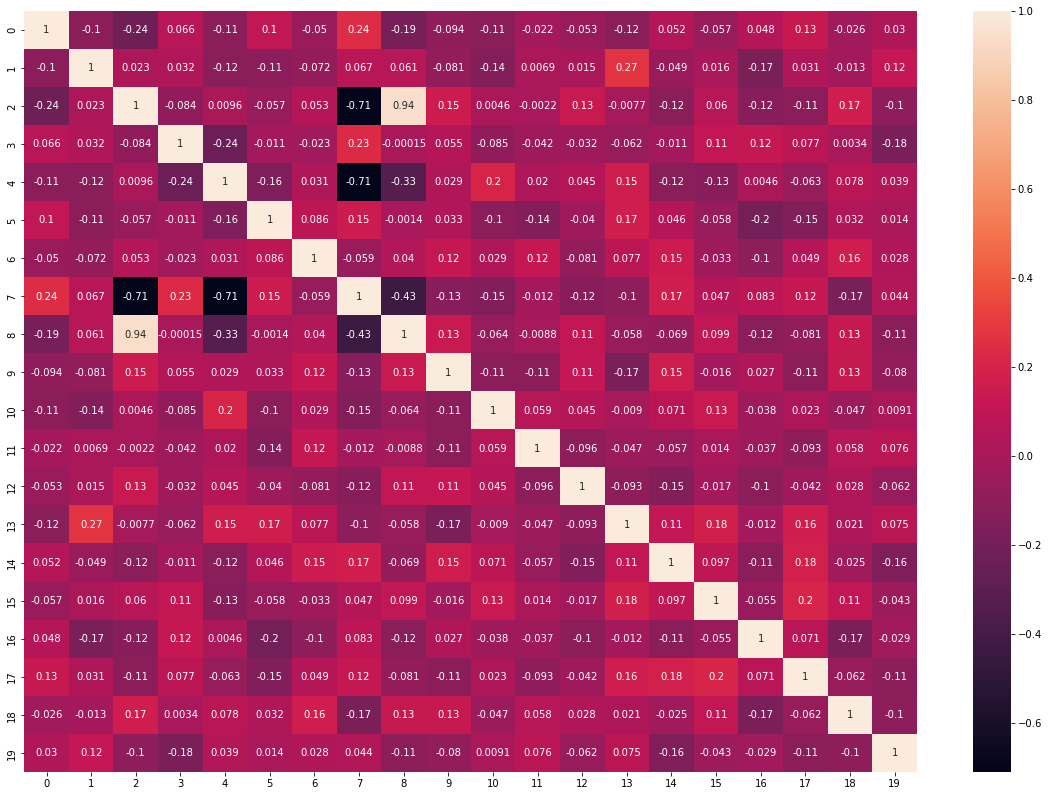

In [256]:
corr = x.corr()
plt.figure(figsize = (20, 14))
sns.heatmap(corr, annot = True)
plt.show()

In [293]:
a = [2, 8]

In [294]:
a3 = [i for i in range(20) if i not in a]
print(f'Незначимые признаки: {a3}')

Незначимые признаки: [0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [295]:
x1 = x.drop(a3, axis = 1)
x1.shape

(100, 2)

In [296]:
c1 = cross_val_score(model, x1, y, scoring = 'accuracy').mean()
c1

/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y

0.9199999999999999

In [261]:
x2 = pd.DataFrame(x)
y2 = pd.DataFrame(y)

In [262]:
selector = VarianceThreshold(threshold = 1.1)
s = selector.fit_transform(x2)

In [263]:
ftr = selector.get_support()

In [299]:
print(f'Значимые признаки: {[i for i, e in enumerate(ftr) if e]}')

Значимые признаки: [2, 4, 5, 7, 8, 14, 19]


In [265]:
concol = [i for i, e in enumerate(ftr) if not e]
print(f'Незначимые признаки: {concol}')

Незначимые признаки: [0, 1, 3, 6, 9, 10, 11, 12, 13, 15, 16, 17, 18]


In [266]:
x2 = x2.drop(concol, axis = 1)
x2.shape

(100, 7)

In [267]:
c2 = cross_val_score(model, x2, y2, scoring = 'accuracy').mean()
c2

/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y

0.89

In [268]:
x3 = pd.DataFrame(x)
y3 = pd.DataFrame(y)

In [269]:
select = SelectKBest(k = 5)
z = select.fit_transform(x3, y3)

/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [270]:
filter_ = select.get_support()
features = x3.columns
print(filter_, '\n')
print(f"5 лучших признаков: {features[filter_]}")

[False False False  True  True False False  True  True False False False
 False False False  True False False False False] 

5 лучших признаков: Int64Index([3, 4, 7, 8, 15], dtype='int64')


In [271]:
concol2 = [i for i, e in enumerate(filter_) if not e]
print(f'Незначимые признаки: {concol2}')

Незначимые признаки: [0, 1, 2, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19]


In [272]:
x3 = x3.drop(concol2, axis = 1)
x3.shape

(100, 5)

In [273]:
c3 = cross_val_score(model, x3, y3, scoring = 'accuracy').mean()
c3

/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y

0.9400000000000001

In [274]:
x4 = pd.DataFrame(x)
y4 = pd.DataFrame(y)

In [275]:
sel_ = SelectFromModel(LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear'))
zz = sel_.fit(x4, y4)

/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [276]:
filter1 = sel_.get_support()

print(f'Значимые признаки: {[i for i, e in enumerate(filter1) if e]}')

Значимые признаки: [1, 4, 5, 6, 8, 10, 12, 14, 15, 16, 19]


In [277]:
concol3 = [i for i, e in enumerate(filter1) if not e]
print(f'Hезначимые признаки: {concol3}')

Hезначимые признаки: [0, 2, 3, 7, 9, 11, 13, 17, 18]


In [278]:
x4 = x4.drop(concol3, axis = 1)
x4.shape

(100, 11)

In [279]:
c4 = cross_val_score(model, x4, y4, scoring = 'accuracy').mean()
c4

/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y

0.9

In [280]:
x5 = pd.DataFrame(x)
y5 = pd.DataFrame(y)

In [281]:
forest = RandomForestClassifier()
forest.fit(x5, y5)

/var/folders/0l/5d6rpb6j07zbqghq7qmrdvgw0000gn/T/ipykernel_22595/615470956.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x5, y5)


RandomForestClassifier()

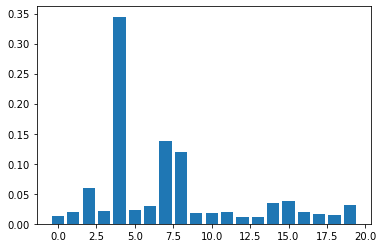

In [282]:
importance = forest.feature_importances_

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [283]:
concol4 = [i for i, e in enumerate(importance) if e < 0.1]
print(f'Hезначимые признаки: {concol4}')

Hезначимые признаки: [0, 1, 2, 3, 5, 6, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [284]:
x5 = x5.drop(concol4, axis = 1)
x5.shape

(100, 3)

In [285]:
c5 = cross_val_score(model, x5, y5, scoring = 'accuracy').mean()
c5

/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y

0.9199999999999999

In [286]:
x6 = pd.DataFrame(x)
y6 = pd.DataFrame(y)

In [287]:
feature_select = SequentialFeatureSelector(LogisticRegression())
feature_select.fit(x_data_generated, y_data_generated)
fiter_features = feature_select.support_

In [288]:
features_true = [i for i, e in enumerate(fiter_features) if e]
print(f'Значимые признаки: {features_true}')

Значимые признаки: [0, 1, 2, 3, 4, 5, 6, 7, 9, 10]


In [289]:
concol5 = [i for i, e in enumerate(fiter_features) if not e]
print(f'Hезначимые признаки: {concol5}')

Hезначимые признаки: [8, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [290]:
x6 = x6.drop(concol5, axis = 1)
x6.shape

(100, 10)

In [291]:
c6 = cross_val_score(model, x6, y6, scoring = 'accuracy').mean()
c6

/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anastasiafedoracenko/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y

0.85

In [300]:
my_df = pd.DataFrame({'way': ['Initial data', 'corr matrix', 'variance threshold',
                                'SelectKBest', 'L1 регуляризация', 'random forest classifier',
                             'sequential feature selector'], 
                      'number of signs ': [len(x), len(a), len(concol), len(concol2), len(concol3), 
                                           len(concol4), len(concol5)],
                      'average accuracy': [c, c1, c2, c3, c4, c5, c6]})
my_df

,way,number of signs,average accuracy
0,Initial data,100,0.89
1,corr matrix,2,0.92
2,variance threshold,13,0.89
3,SelectKBest,15,0.94
4,L1 регуляризация,9,0.90
5,random forest classifier,17,0.92
6,sequential feature selector,10,0.85


### Вывод 

Отбрасывая незначительные признаки можно улучшить качество модели. Визуальный медот на основе матирицы коррелляции уже дает видимый эффект. Лучший результат показал метод выбора 5 лучших признаков с помощью скоринговой функции, то есть SelectKBest. 